In [21]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn import datasets
from tensorflow.examples.tutorials.mnist import input_data
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import argparse


In [22]:
# grab the MNIST dataset (if this is your first time running this
# script, the download may take a minute -- the 55MB MNIST dataset
# will be downloaded)
print("[INFO] loading MNIST (full) dataset...")
#dataset = datasets.fetch_mldata("MNIST Original")
mnist_raw = loadmat("./mnist-original.mat")
dataset = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESR": "mldata.org dataset: mnist-original",
}

# scale the raw pixel intensities to the range [0, 1.0], then
# construct the training and testing splits
data = dataset["data"].astype("float") / 255.0
(trainX, testX, trainY, testY) = train_test_split(data,
dataset["target"], test_size=0.25)


[INFO] loading MNIST (full) dataset...


In [26]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
    metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
    epochs=100, batch_size=128)


[INFO] training network...
Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 2s 38us/step - loss: 2.2830 - acc: 0.1818 - val_loss: 2.2470 - val_acc: 0.2830
Epoch 2/100
52500/52500 [==============================] - 2s 31us/step - loss: 2.2153 - acc: 0.3701 - val_loss: 2.1846 - val_acc: 0.4217
Epoch 3/100
52500/52500 [==============================] - 2s 30us/step - loss: 2.1425 - acc: 0.4989 - val_loss: 2.1002 - val_acc: 0.4894
Epoch 4/100
52500/52500 [==============================] - 2s 31us/step - loss: 2.0420 - acc: 0.5684 - val_loss: 1.9848 - val_acc: 0.6341
Epoch 5/100
52500/52500 [==============================] - 2s 31us/step - loss: 1.9036 - acc: 0.6235 - val_loss: 1.8271 - val_acc: 0.5901
Epoch 6/100
52500/52500 [==============================] - 2s 32us/step - loss: 1.7274 - acc: 0.6602 - val_loss: 1.6394 - val_acc: 0.6657
Epoch 7/100
52500/52500 [==============================] - 2s 31us/step - loss: 1.5339 - acc: 0

52500/52500 [==============================] - 1s 25us/step - loss: 0.3204 - acc: 0.9076 - val_loss: 0.3365 - val_acc: 0.9031
Epoch 60/100
52500/52500 [==============================] - 1s 26us/step - loss: 0.3188 - acc: 0.9084 - val_loss: 0.3345 - val_acc: 0.9045
Epoch 61/100
52500/52500 [==============================] - 1s 26us/step - loss: 0.3172 - acc: 0.9089 - val_loss: 0.3329 - val_acc: 0.9045
Epoch 62/100
52500/52500 [==============================] - 1s 25us/step - loss: 0.3156 - acc: 0.9090 - val_loss: 0.3313 - val_acc: 0.9043
Epoch 63/100
52500/52500 [==============================] - 1s 25us/step - loss: 0.3141 - acc: 0.9098 - val_loss: 0.3297 - val_acc: 0.9055
Epoch 64/100
52500/52500 [==============================] - 1s 25us/step - loss: 0.3125 - acc: 0.9100 - val_loss: 0.3282 - val_acc: 0.9060
Epoch 65/100
52500/52500 [==============================] - 1s 25us/step - loss: 0.3111 - acc: 0.9106 - val_loss: 0.3270 - val_acc: 0.9062
Epoch 66/100
52500/52500 [==============

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1706
           1       0.95      0.97      0.96      1978
           2       0.92      0.89      0.91      1742
           3       0.89      0.89      0.89      1824
           4       0.92      0.91      0.92      1653
           5       0.88      0.86      0.87      1604
           6       0.93      0.95      0.94      1735
           7       0.94      0.92      0.93      1793
           8       0.90      0.87      0.88      1737
           9       0.87      0.90      0.89      1728

   micro avg       0.92      0.92      0.92     17500
   macro avg       0.91      0.91      0.91     17500
weighted avg       0.91      0.92      0.91     17500



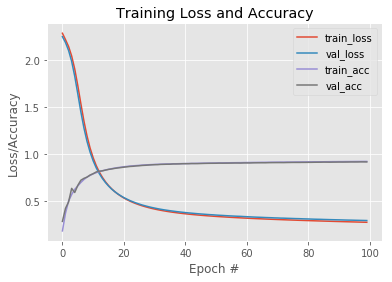

In [28]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=[str(x) for x in lb.classes_]))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("keras_mnist")